# `Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("FuelConsumptionCo2.csv")

In [3]:
data=data[['FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [6]:
data.rename(columns={'FUELCONSUMPTION_COMB_MPG':'combustion','CO2EMISSIONS':'emission'},inplace=True)

In [7]:
data.head()

,combustion,emission
0,33,196
1,29,221
2,48,136
3,25,255
4,27,244


In [8]:
data.shape

(1067, 2)

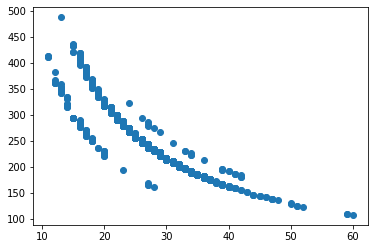

In [9]:
plt.scatter(data.combustion,data.emission)

In [24]:
x=data.iloc[:,0:1].values
y=data.iloc[:,-1].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
L =LinearRegression()

In [29]:
L.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred=L.predict(x_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error

In [36]:
print("R2 Score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.8261445883060663
RMSE 27.0911073218799


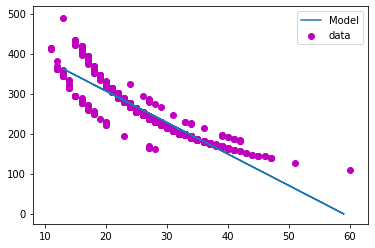

In [45]:
plt.plot(x_test,L.predict(x_test),label="Model")
plt.scatter(x_train,y_train,label="data",color="m")
plt.legend()
plt.show()

#### `Polynomial Regression

In [73]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

In [74]:
x_poly = poly.fit_transform(x_train)
print(x_poly.shape)
x_poly

(853, 6)


array([[1.0000000e+00, 2.2000000e+01, 4.8400000e+02, 1.0648000e+04,
        2.3425600e+05, 5.1536320e+06],
       [1.0000000e+00, 1.9000000e+01, 3.6100000e+02, 6.8590000e+03,
        1.3032100e+05, 2.4760990e+06],
       [1.0000000e+00, 2.7000000e+01, 7.2900000e+02, 1.9683000e+04,
        5.3144100e+05, 1.4348907e+07],
       ...,
       [1.0000000e+00, 2.4000000e+01, 5.7600000e+02, 1.3824000e+04,
        3.3177600e+05, 7.9626240e+06],
       [1.0000000e+00, 2.1000000e+01, 4.4100000e+02, 9.2610000e+03,
        1.9448100e+05, 4.0841010e+06],
       [1.0000000e+00, 2.5000000e+01, 6.2500000e+02, 1.5625000e+04,
        3.9062500e+05, 9.7656250e+06]])

In [75]:
L1=LinearRegression()
L1.fit(x_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
x_test_poly=poly.fit_transform(x_test)

In [77]:
y_pred= L1.predict(x_test_poly)

In [78]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8951339533296806
RMSE 21.040211340844436


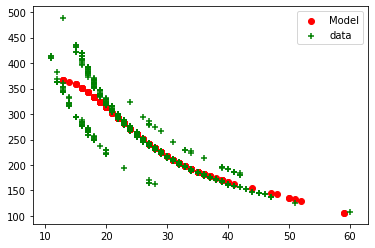

In [79]:
plt.scatter(x_test,y_pred, label="Model",color='red')
plt.scatter(x_train, y_train, label="data", marker='+',color='green')
#plt.scatter(X,y,label="Training data")
plt.legend()
plt.show()
